# Act locally: linearize! 
## Lab 7 for BIOS 26210

### Name: 
### Lab section:

In [2]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Assignment Overview:

In this lab, we will *linearize* nonlinear systems of ODEs and classify the dynamics near the fixed points. To do this, we use the Jacobian matrix of the ODE functions to approximate the dynamics of the nonlinear system in the neighborhood of a fixed point. This allows us to classify the flow around the fixed point using the eigenvalues of the Jacobian.

The main objective from a programming perspective is to utilize functions to make your code efficient and flexible for handling an arbitrary two-variable ODE. You will do the following:

1. Define functions to return the defining function and the Jacobian matrix of a particular ODE model.

2. Write a function to calculate the eigenvalues of the Jacobian at each fixed point, and report its classification.


See below for detailed instructions for each task.


## The models:

1. Two species (figuratively called sheep and rabbits) occupy the same ecological niche and compete with each other. This is represented by the following model:

$$ 
\frac{dS}{dt} = S(a-S-bR) \\
\frac{dR}{dt} = R(c-R-dS) 
$$

       a) a=2; b=1; c=3; d=2
       b) a=2; b=0.5; c=3; d=1

2. A model for two species that interact in a mutually beneficial manner.  
Species X dies out in the absence of species Y, while species Y reaches a carrying capacity in the absence of species X:

$$  
\frac{dX}{dt} = -aX + bXY \\
  \frac{dY}{dt} = cY(1-Y) + dXY 
$$

    a) a=1, b=2, c=1, d=3
    b) a=2, b=1, c=1, d=2
 
3. Lotka - Volterra predator prey model:
Assume the prey grows without bound without the predator, and the predators die without the prey. The interaction of predators and prey has a positive effect on the predators, and a negative effect on the prey:

$$   
 \frac{dP}{dt} = -dP + aPR \\
 \frac{dR}{dt} = cR - bPR 
$$

    a) c=2; d=5; a=0.5; b=0.4
    b) c=10; d=5; a=0.5; b=0.4

## Part 1: Plot the phase portrait and find the fixed points

You will analyze the ecological ODEs models defined above. For each one you will need to:

1. Calculate the Jacobian matrix for on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define functions in python to do the following (see code below for a simple example):

        a) calculate the ODE function for the specific ODEs, with the variables (e.g. R, S) as one vector input and the parameters as separate inputs, and the vector of derivatives as the output
        b) calculate the Jacobian mattrix for the specific ODE, with the variables (e.g. R, S) as one vector input and the parameters as separate inputs, and the Jacobian matrix as the output
        

2. Calculate the nullclines and the fixed points of the ODE on paper keeping the parameters as letters, so that any parameter values can be plugged in. Then plot the phase portrait over an area of the phase plane that includes all of the fixed points you have found, and overlay the nullclines over the phase portrait, using different colors for the two different directions. Indicate the fixed point using a large point, e.g. using plot at the individual fixed points with options: color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0.

In [1]:
# Example for defining the ODE function and the Jacobian for the system of ODEs:
# dX/dt = -a*X + b*Y^2
# dY/dt = -cX^2 + d*Y

def ODE_fun(x,a,b,c,d): # function that defines the ODE
    return [-a*x[0]+b*x[1]**2, 
            -c*x[0]**2 + d*x[1]]

def ODE_jac(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[-a, 2*b*x[1]],
                     [-2*c*x[0], d*x[1]]])



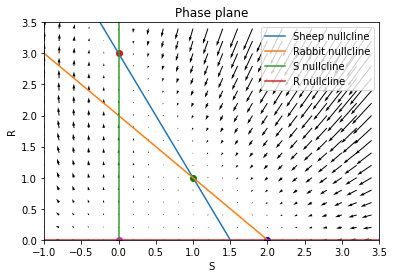

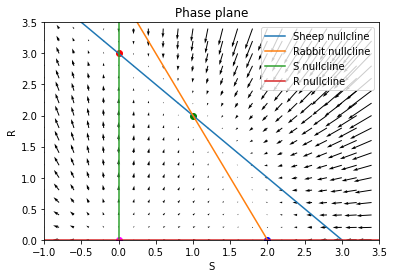

In [5]:
def ODE_fun(x,a,b,c,d): # function that defines the ODE
    return [a*x[0]-x[0]**2-b*x[0]*x[1], 
            c*x[1]-x[1]**2 - d*x[0]*x[1]]

def ODE_jac(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[a-2*x[0]-b*x[1], -b*x[0]],
                     [-d*x[1], c-2*x[1]-d*x[0]]])

#A.
xmin = -1 #change the parameters here to control the range of the axes
xmax = 3.5
ymin = 0
ymax = 3.5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
S = np.arange(xmin, xmax, dx)
R = np.arange(ymin, ymax, dy)
s,r = np.meshgrid(S,R) #create a grid

a = 2
b = 1
c = 3
d = 2
ds,dr = ODE_fun([s,r],a,b,c,d) #overwrites the other dx


fig, ax = plt.subplots()
q=ax.quiver(s, r, ds, dr)
plt.xlabel('S')
plt.ylabel('R')
plt.title('Phase plane')

plt.plot(S,c-d*S,label="Sheep nullcline")
plt.plot(S,(a-S)/b,label="Rabbit nullcline")
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

vnully=np.linspace(ymin,ymax,100)
vnullx=np.linspace(xmin,xmax,100)
vnull1_x=np.zeros(100)
vnull1_y=np.zeros(100)

plt.plot(vnull1_x,vnully,label="S nullcline")
plt.plot(vnullx,vnull1_y,label="R nullcline")





plt.scatter(0,0,color="magenta",marker="o",linestyle="None")
plt.scatter(0,3,color="red",marker="o",linestyle="None")
plt.scatter(2,0,color="blue",marker="o",linestyle="None")
plt.scatter((b*c-a)/(b*d-1),c-d*((b*c-a)/(b*d-1)), color="green",marker="o",linestyle="None")



plt.legend()
plt.show()





#B.
a = 2
b = .5
c = 3
d = 1
ds,dr = ODE_fun([s,r],a,b,c,d) #overwrites the other dx


fig, ax = plt.subplots()
q=ax.quiver(s, r, ds, dr)
plt.xlabel('S')
plt.ylabel('R')
plt.title('Phase plane')

plt.plot(S,c-d*S,label="Sheep nullcline")
plt.plot(S,(a-S)/b,label="Rabbit nullcline")

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

vnully=np.linspace(ymin,ymax,100)
vnullx=np.linspace(xmin,xmax,100)
vnull1_x=np.zeros(100)
vnull1_y=np.zeros(100)

plt.plot(vnull1_x,vnully,label="S nullcline")
plt.plot(vnullx,vnull1_y,label="R nullcline")

plt.scatter(0,0,color="magenta",marker="o",linestyle="None")
plt.scatter(0,3,color="red",marker="o",linestyle="None")
plt.scatter(2,0,color="blue",marker="o",linestyle="None")
plt.scatter((b*c-a)/(b*d-1),c-d*((b*c-a)/(b*d-1)), color="green",marker="o",linestyle="None")



plt.legend()
plt.show()




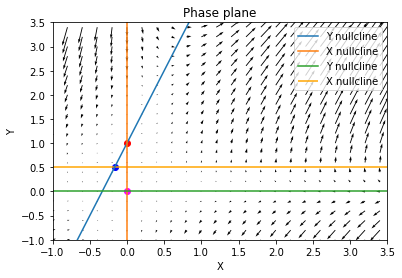

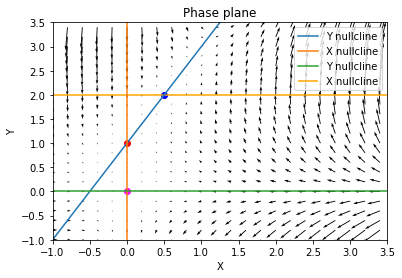

In [8]:
def ODE_fun(x,a,b,c,d): # function that defines the ODE
    return [-a*x[0]+b*x[0]*x[1], 
            c*x[1]*(1-x[1])+d*x[0]*x[1]]

def ODE_jac(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[-a+b*x[1], b*x[0]],[d*x[1], c-2*c*x[1]+d*x[0]]])

#A.
xmin = -1 #change the parameters here to control the range of the axes
xmax = 3.5
ymin = -1
ymax = 3.5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x,y = np.meshgrid(X,Y) #create a grid

a = 1
b = 2
c = 1
d = 3
dx,dy = ODE_fun([x,y],a,b,c,d) #overwrites the other dx


fig, ax = plt.subplots()
q=ax.quiver(x, y, dx, dy)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Phase plane')


plt.plot(X,(d*X+c)/c,label="Y nullcline")

plt.hlines(a/b,-1,3.5,label="X nullcline",color="orange")
plt.xlim(-1,3.5)
plt.ylim(-1,3.5)

vnully=np.linspace(ymin,ymax,100)
vnullx=np.linspace(xmin,xmax,100)
vnull1_x=np.zeros(100)
vnull1_y=np.zeros(100)

plt.plot(vnull1_x,vnully,label="X nullcline")
plt.plot(vnullx,vnull1_y,label="Y nullcline")

plt.scatter(0,0,color="magenta",marker="o",linestyle="None")
plt.scatter(0,1,color="red",marker="o",linestyle="None")
plt.scatter(-((c*a)/b-c/d),.5,color="blue",marker="o",linestyle="None")



plt.legend()
plt.show()





#B.
a = 2
b = 1
c = 1
d = 2
dx,dy = ODE_fun([x,y],a,b,c,d) #overwrites the other dx


fig, ax = plt.subplots()
q=ax.quiver(x, y, dx, dy)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Phase plane')

plt.hlines(a/b,-1,3.5,label="X nullcline",color="orange")
plt.plot(X,(d*X+c)/c,label="Y nullcline")

plt.xlim(-1,3.5)
plt.ylim(-1,3.5)


vnully=np.linspace(ymin,ymax,100)
vnullx=np.linspace(xmin,xmax,100)
vnull1_x=np.zeros(100)
vnull1_y=np.zeros(100)

plt.plot(vnull1_x,vnully,label="X nullcline")
plt.plot(vnullx,vnull1_y,label="Y nullcline")

plt.scatter(0,0,color="magenta",marker="o",linestyle="None")
plt.scatter(0,1,color="red",marker="o",linestyle="None")
plt.scatter(.5,2,color="blue",marker="o",linestyle="None")



plt.legend()
plt.show()




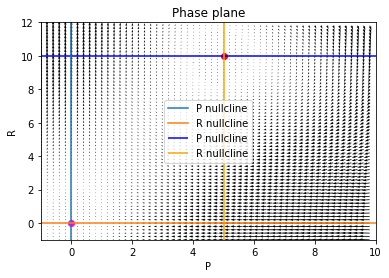

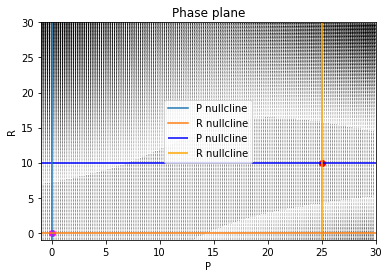

In [10]:
def ODE_fun(x,a,b,c,d): # function that defines the ODE
    return [-d*x[0]+a*x[0]*x[1], 
            c*x[1]-b*x[0]*x[1]]

def ODE_jac(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[-d+a*x[1], a*x[0]],
                     [-b*x[1], c-b*x[0]]])

#A.
xmin = -1 #change the parameters here to control the range of the axes
xmax = 10
ymin = -1
ymax = 12
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x,y = np.meshgrid(X,Y) #create a grid

a = .5
b = .4
c = 2
d = 5
dx,dy = ODE_fun([x,y],a,b,c,d) #overwrites the other dx


fig, ax = plt.subplots()
q=ax.quiver(x, y, dx, dy)
plt.xlabel('P')
plt.ylabel('R')
plt.title('Phase plane')
plt.xlim(-1,10)
plt.ylim(-1,12)

plt.hlines(d/a,-1,10,label="P nullcline",color="blue")
plt.vlines(c/b,-1,12,label="R nullcline",color="orange")

vnully=np.linspace(ymin,ymax,100)
vnullx=np.linspace(xmin,xmax,100)
vnull1_x=np.zeros(100)
vnull1_y=np.zeros(100)

plt.plot(vnull1_x,vnully,label="P nullcline")
plt.plot(vnullx,vnull1_y,label="R nullcline")

plt.scatter(0,0,color="magenta",marker="o",linestyle="None")
plt.scatter(5,10,color="red",marker="o",linestyle="None")



plt.legend()
plt.show()





#B.
xmin = -1 #change the parameters here to control the range of the axes
xmax = 30
ymin = -1
ymax = 30
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x,y = np.meshgrid(X,Y) #create a gri
a = .5
b = .4
c = 10
d = 5
dx,dy = ODE_fun([x,y],a,b,c,d) #overwrites the other dx


fig, ax = plt.subplots()
q=ax.quiver(x, y, dx, dy)
plt.xlabel('P')
plt.ylabel('R')
plt.title('Phase plane')
plt.xlim(-1,30)
plt.ylim(-1,30)

plt.hlines(d/a,-1,30,label="P nullcline",color="blue")
plt.vlines(c/b,-1,30,label="R nullcline",color="orange")

vnully=np.linspace(ymin,ymax,100)
vnullx=np.linspace(xmin,xmax,100)
vnull1_x=np.zeros(100)
vnull1_y=np.zeros(100)

plt.plot(vnull1_x,vnully,label="P nullcline")
plt.plot(vnullx,vnull1_y,label="R nullcline")

plt.scatter(0,0,color="magenta",marker="o",linestyle="None")
plt.scatter(25,10,color="red",marker="o",linestyle="None")




plt.legend()
plt.show()




## Part 2: Calculate the eigenvalues and classify the fixed points

Write a function to calculate the eigenvalues for any given ODE_Jac and a given fixed point, e.g. following the outline in the computational section of chapter 8. The function takes the eigenvalues as input arguments and returns the classification of the fixed point (as a character string). Here are the fundamental classes of fixed points:

|eigenvalues | two positive real parts  | two negative real parts| mixed real parts  | zero real part       |
|------------|--------------------------|------------------------|-------------------|----------------------|
|real        | unstable node            | stable node            | saddle            | line of fixed points |
| complex    | unstable spiral          | stable spiral          | N/A               | center               |

The function will have two inputs: the eigenvalues and a tolerance parameter. The tolerance is needed to avoid being fooled by tiny numbers, e.g. 1e-12, which are numerically zero. So instead of using a comparison like x>0 to check if x is positive, you should use x>tol to check if x is positive outside of machine error. (What should you do to check if x is negative?) The function should return the classification as a characeter string.

Use the function on all of the above models and parameter sets to classify all of the fixed points.


In [3]:
# Model 1


#A.

a=2
b=1
c=3          
d=2

def ODE_jac(x,y,a,b,c,d): # function that defines the Jacobian
    return np.array([[a-2*x-b*y, -b*x],
                     [-d*y, c-2*y-d*x]])

x=np.array([0,0,2,(b*c-a)/(b*d-1)])
y=np.array([0,3,0,c-d*((b*c-a)/(b*d-1))])


print("Parameter set A")  
    
for i in range(len(x)):
    jac=ODE_jac(x[i],y[i],a,b,c,d)
    eVals,eVecs=np.linalg.eig(jac)
    print('Eigenvalues:'+str(eVals)) 
    
    if np.real(eVals[0])>0 and np.real(eVals[1])>0:
        if np.imag(eVals[0])==0:
            print("unstable node")
            
        else:
            print("unstable spiral")
            
    if np.real(eVals[0])<0 and np.real(eVals[1])<0:
        if np.imag(eVals[0])==0:
            print("stable node")
            
        else:
            print("stable spiral")
            
    if np.real(eVals[0])*np.real(eVals[1])<0:
        print("saddle point")
        
    if np.real(eVals[0])*np.real(eVals[1])==0:
        if np.imag(eVals[0])!=0:
            print("center point")
            
        else:
            print("line of fixed points")
            

#B.

a=2
b=.5
c=3          
d=1

def ODE_jac(x,y,a,b,c,d): # function that defines the Jacobian
    return np.array([[a-2*x-b*y, -b*x],
                     [-d*y, c-2*y-d*x]])

x=np.array([0,0,2,(b*c-a)/(b*d-1)])
y=np.array([0,3,0,c-d*((b*c-a)/(b*d-1))])


print("Parameter set B") 
    
for i in range(len(x)):
    jac=ODE_jac(x[i],y[i],a,b,c,d)
    eVals,eVecs=np.linalg.eig(jac)
    print('Eigenvalues:'+str(eVals)) 
    
    if np.real(eVals[0])>0 and np.real(eVals[1])>0:
        if np.imag(eVals[0])==0:
            print("unstable node")
            
        else:
            print("unstable spiral")
            
    if np.real(eVals[0])<0 and np.real(eVals[1])<0:
        if np.imag(eVals[0])==0:
            print("stable node")
            
        else:
            print("stable spiral")
            
    if np.real(eVals[0])*np.real(eVals[1])<0:
        print("saddle point")
        
    if np.real(eVals[0])*np.real(eVals[1])==0:
        if np.imag(eVals[0])!=0:
            print("center point")
            
        else:
            print("line of fixed points")




Parameter set A
Eigenvalues:[2. 3.]
unstable node
Eigenvalues:[-3. -1.]
stable node
Eigenvalues:[-2. -1.]
stable node
Eigenvalues:[ 0.41421356 -2.41421356]
saddle point
Parameter set B
Eigenvalues:[2. 3.]
unstable node
Eigenvalues:[-3.   0.5]
saddle point
Eigenvalues:[-2.  1.]
saddle point
Eigenvalues:[-0.38196601 -2.61803399]
stable node


In [6]:
# Model 2

#A.
def ODE_jac(x,y,a,b,c,d): # function that defines the Jacobian
    return np.array([[-a+b*y, b*x],[d*y, c-2*c*y+d*x]])

a = 1
b = 2
c = 1
d = 3

x=np.array([0,0,-((c*a)/b-c/d)])
y=np.array([0,1,.5])

print("Parameter set A")  
    
for i in range(len(x)):
    jac=ODE_jac(x[i],y[i],a,b,c,d)
    eVals,eVecs=np.linalg.eig(jac)
    print('Eigenvalues:'+str(eVals)) 
    
    if np.real(eVals[0])>0 and np.real(eVals[1])>0:
        if np.imag(eVals[0])==0:
            print("unstable node")
            
        else:
            print("unstable spiral")
            
    if np.real(eVals[0])<0 and np.real(eVals[1])<0:
        if np.imag(eVals[0])==0:
            print("stable node")
            
        else:
            print("stable spiral")
            
    if np.real(eVals[0])*np.real(eVals[1])<0:
        print("saddle point")
        
    if np.real(eVals[0])*np.real(eVals[1])==0:
        if np.imag(eVals[0])!=0:
            print("center point")
            
        else:
            print("line of fixed points")
            
            
#B.
def ODE_jac(x,y,a,b,c,d): # function that defines the Jacobian
    return np.array([[-a+b*y, b*x],[d*y, c-2*c*y+d*x]])

a = 2
b = 1
c = 1
d = 2

x=np.array([0,0,.5])
y=np.array([0,1,2])

print("Parameter set B")  
    
for i in range(len(x)):
    jac=ODE_jac(x[i],y[i],a,b,c,d)
    eVals,eVecs=np.linalg.eig(jac)
    print('Eigenvalues:'+str(eVals)) 
    
    if np.real(eVals[0])>0 and np.real(eVals[1])>0:
        if np.imag(eVals[0])==0:
            print("unstable node")
            
        else:
            print("unstable spiral")
            
    if np.real(eVals[0])<0 and np.real(eVals[1])<0:
        if np.imag(eVals[0])==0:
            print("stable node")
            
        else:
            print("stable spiral")
            
    if np.real(eVals[0])*np.real(eVals[1])<0:
        print("saddle point")
        
    if np.real(eVals[0])*np.real(eVals[1])==0:
        if np.imag(eVals[0])!=0:
            print("center point")
            
        else:
            print("line of fixed points")
            
        

Parameter set A
Eigenvalues:[-1.  1.]
saddle point
Eigenvalues:[-1.  1.]
saddle point
Eigenvalues:[-0.25+0.66143783j -0.25-0.66143783j]
stable spiral
Parameter set B
Eigenvalues:[-2.  1.]
saddle point
Eigenvalues:[-1. -1.]
stable node
Eigenvalues:[ 0.73205081 -2.73205081]
saddle point


In [3]:
# Model 3

#A.
def ODE_jac(x,y,a,b,c,d): # function that defines the Jacobian
    return np.array([[-d+a*y, a*x],[-b*y, c-b*x]])

a = .5
b = .4
c = 2
d = 5

x=np.array([0,5])
y=np.array([0,10])

print("Parameter set A")  
    
for i in range(len(x)):
    jac=ODE_jac(x[i],y[i],a,b,c,d)
    eVals,eVecs=np.linalg.eig(jac)
    print('Eigenvalues:'+str(eVals)) 
    
    if np.real(eVals[0])>0 and np.real(eVals[1])>0:
        if np.imag(eVals[0])==0:
            print("unstable node")
            
        else:
            print("unstable spiral")
            
    if np.real(eVals[0])<0 and np.real(eVals[1])<0:
        if np.imag(eVals[0])==0:
            print("stable node")
            
        else:
            print("stable spiral")
            
    if np.real(eVals[0])*np.real(eVals[1])<0:
        print("saddle point")
        
    if np.real(eVals[0])*np.real(eVals[1])==0:
        if np.imag(eVals[0])!=0:
            print("center point")
            
        else:
            print("line of fixed points")
            
            
#B.
def ODE_jac(x,y,a,b,c,d): # function that defines the Jacobian
    return np.array([[-d+a*y, a*x],[-b*y, c-b*x]])

a = .5
b = .4
c = 10
d = 5

x=np.array([0,25])
y=np.array([0,10])

print("Parameter set B")  
    
for i in range(len(x)):
    jac=ODE_jac(x[i],y[i],a,b,c,d)
    eVals,eVecs=np.linalg.eig(jac)
    print('Eigenvalues:'+str(eVals)) 
    
    if np.real(eVals[0])>0 and np.real(eVals[1])>0:
        if np.imag(eVals[0])==0:
            print("unstable node")
            
        else:
            print("unstable spiral")
            
    if np.real(eVals[0])<0 and np.real(eVals[1])<0:
        if np.imag(eVals[0])==0:
            print("stable node")
            
        else:
            print("stable spiral")
            
    if np.real(eVals[0])*np.real(eVals[1])<0:
        print("saddle point")
        
    if np.real(eVals[0])*np.real(eVals[1])==0:
        if np.imag(eVals[0])!=0:
            print("center point")
            
        else:
            print("line of fixed points")
            
        

Parameter set A
Eigenvalues:[-5.  2.]
saddle point
Eigenvalues:[0.+3.16227766j 0.-3.16227766j]
center point
Parameter set B
Eigenvalues:[-5. 10.]
saddle point
Eigenvalues:[0.+7.07106781j 0.-7.07106781j]
center point
